In [1]:
import qutip as qt
import numpy as np
import sympy as sp
from qiskit import QuantumCircuit

rho_0 = sp.Matrix([[1,0],[0,0]])
rho_1 = sp.Matrix([[0,0],[0,1]])
H = 1/sp.sqrt(2)*sp.Matrix([[1,1],[1,-1]])


In [2]:
def some(n=9, name='xh'):
    qc = QuantumCircuit(n, name=name)
    qc.x(0)
    qc.x(0)
    return qc

U_gate = some().to_gate()
U_gate.label = "Error"


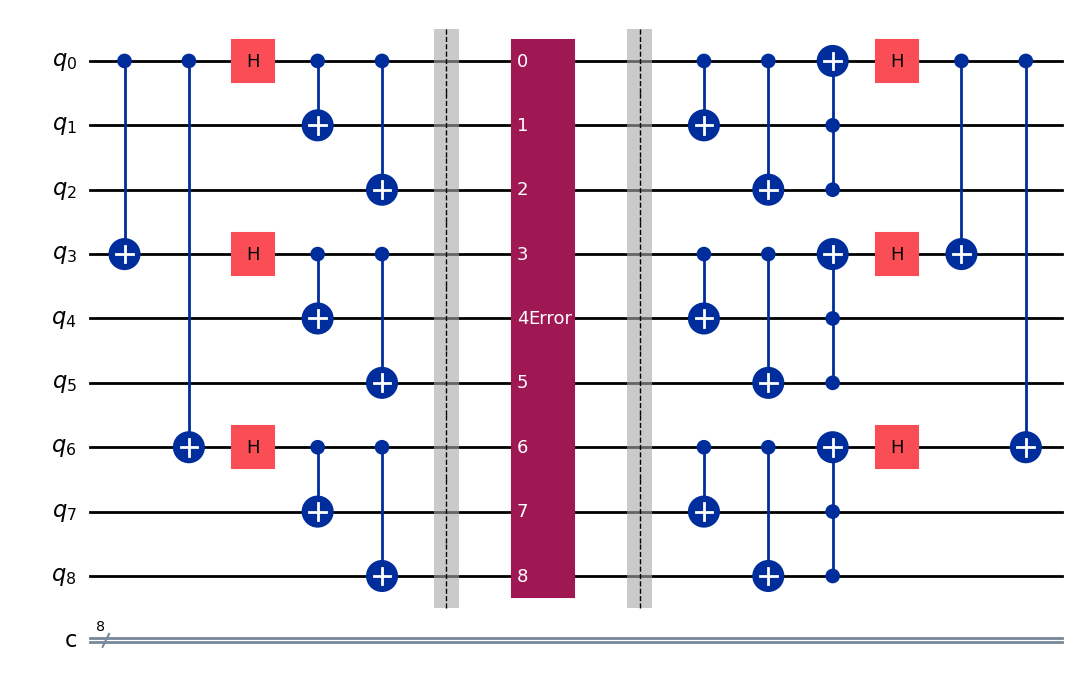

In [3]:
# Create a Quantum Circuit with 5 qubits (3 for encoding, 1 for syndrome, 1 for ancilla)
qc = QuantumCircuit(9,8)

# Encoding |ψ⟩ into |ψ'⟩ using 3 qubits
qc.cx(0, 3)
qc.cx(0, 6)

qc.h([0,3,6])

qc.cx(0,1)
qc.cx(3,4)
qc.cx(6,7)

qc.cx(0,2)
qc.cx(3,5)
qc.cx(6,8)

qc.barrier()
qc.append(U_gate,range(9))
qc.barrier()

qc.cx(0,1)
qc.cx(3,4)
qc.cx(6,7)

qc.cx(0,2)
qc.cx(3,5)
qc.cx(6,8)

qc.ccx(1,2,0)
qc.ccx(4,5,3)
qc.ccx(7,8,6)

qc.h([0,3,6])
qc.cx(0, 3)
qc.cx(0, 6)

# qc.barrier()
# qc.measure(range(1,9),range(8))
qc.draw('mpl')

In [2]:
I = sp.Matrix([[1, 0], [0, 1]])
X = sp.Matrix([[0, 1], [1, 0]])
Y = sp.Matrix([[0, -sp.I], [sp.I, 0]])
Z = sp.Matrix([[1, 0], [0, -1]])

rx, ry, rz = sp.symbols('rx ry rz')

rho_a = (I + rx * X + ry * Y + rz * Z) / 2
# rho_a = rho_0
rho = sp.kronecker_product(rho_a,rho_0,rho_0,rho_0,rho_0,rho_0,rho_0,rho_0,rho_0)

# print(rho)
# rho

In [27]:
p = sp.symbols('p')
K_0 = sp.sqrt(p)*sp.kronecker_product(Z@X,Z@X,Z@X,Z@X,Z@X,Z@X,Z@X,Z@X,Z@X)
K_1 = sp.sqrt(1-p)*sp.kronecker_product(I,I,I,I,I,I,I,I,I)


In [28]:
U_1 = sp.kronecker_product(rho_0,I,I,I,I,I,I,I,I) + sp.kronecker_product(rho_1,I,I,X,I,I,I,I,I)
U_2 = sp.kronecker_product(rho_0,I,I,I,I,I,I,I,I) + sp.kronecker_product(rho_1,I,I,I,I,I,X,I,I)
rho_H = sp.kronecker_product(H,I,I,H,I,I,H,I,I)
U_3 = (sp.kronecker_product(rho_0,I,I,I,I,I,I,I,I) + sp.kronecker_product(rho_1,X,I,I,I,I,I,I,I))*(sp.kronecker_product(I,I,I,rho_0,I,I,I,I,I) + sp.kronecker_product(I,I,I,rho_1,X,I,I,I,I))*(sp.kronecker_product(I,I,I,I,I,I,rho_0,I,I) + sp.kronecker_product(I,I,I,I,I,I,rho_1,X,I))
U_4 = (sp.kronecker_product(rho_0,I,I,I,I,I,I,I,I) + sp.kronecker_product(rho_1,I,X,I,I,I,I,I,I))*(sp.kronecker_product(I,I,I,rho_0,I,I,I,I,I) + sp.kronecker_product(I,I,I,rho_1,I,X,I,I,I))*(sp.kronecker_product(I,I,I,I,I,I,rho_0,I,I) + sp.kronecker_product(I,I,I,I,I,I,rho_1,I,X))
U_6 = U_3
U_7 = U_4
U_8 = sp.kronecker_product(I,rho_0,rho_0,I,I,I,I,I,I) + sp.kronecker_product(I,rho_0,rho_1,I,I,I,I,I,I) + sp.kronecker_product(I,rho_1,rho_0,I,I,I,I,I,I) + sp.kronecker_product(X,rho_1,rho_1,I,I,I,I,I,I) 
U_8 = U_8*(sp.kronecker_product(I,I,I,I,rho_0,rho_0,I,I,I) + sp.kronecker_product(I,I,I,I,rho_0,rho_1,I,I,I) + sp.kronecker_product(I,I,I,I,rho_1,rho_0,I,I,I) + sp.kronecker_product(I,I,I,X,rho_1,rho_1,I,I,I))
U_8 = U_8*(sp.kronecker_product(I,I,I,I,I,I,I,rho_0,rho_0) + sp.kronecker_product(I,I,I,I,I,I,I,rho_0,rho_1) + sp.kronecker_product(I,I,I,I,I,I,I,rho_1,rho_0) + sp.kronecker_product(I,I,I,I,I,I,X,rho_1,rho_1))
U_9 = U_1
U_10 = U_2
U_11 = sp.kronecker_product(I,I,I,rho_0,I,I,rho_0,I,I) + sp.kronecker_product(I,I,I,rho_0,I,I,rho_1,I,I) + sp.kronecker_product(I,I,I,rho_1,I,I,rho_0,I,I) + sp.kronecker_product(X,I,I,rho_1,I,I,rho_1,I,I) 


In [29]:
Ua = U_11*U_10*U_9*rho_H*U_8*U_7*U_6*K_0*U_4*U_3*rho_H*U_2*U_1
Ub = U_11*U_10*U_9*rho_H*U_8*U_7*U_6*K_1*U_4*U_3*rho_H*U_2*U_1


In [30]:
final = Ub@rho@Ub.transpose() + Ua@rho@Ua.transpose()


In [36]:
import sympy as sp
import itertools

def partial_trace(rho, n, qubits_to_trace_out):
    dim = 2 ** n
    
    # Define the indices for the new matrix
    remaining_qubits = sorted(set(range(n)) - set(qubits_to_trace_out))
    remaining_dim = 2 ** len(remaining_qubits)
    
    # Initialize the reduced density matrix
    reduced_rho = sp.zeros(remaining_dim, remaining_dim)
    
    # Iterate over all possible states of the remaining qubits
    for idx1, idx2 in itertools.product(range(remaining_dim), repeat=2):
        idx1_bin = format(idx1, f'0{len(remaining_qubits)}b')
        idx2_bin = format(idx2, f'0{len(remaining_qubits)}b')
        
        total_sum = 0
        for trace_state in range(2 ** len(qubits_to_trace_out)):
            trace_state_bin = format(trace_state, f'0{len(qubits_to_trace_out)}b')
            
            # Construct the full state for the original system
            full_state1 = ['0'] * n
            full_state2 = ['0'] * n
            
            for i, q in enumerate(remaining_qubits):
                full_state1[q] = idx1_bin[i]
                full_state2[q] = idx2_bin[i]
            
            for i, q in enumerate(qubits_to_trace_out):
                full_state1[q] = trace_state_bin[i]
                full_state2[q] = trace_state_bin[i]
            
            # Convert binary strings to indices
            full_index1 = int(''.join(full_state1), 2)
            full_index2 = int(''.join(full_state2), 2)
            
            total_sum += rho[full_index1, full_index2]
        
        reduced_rho[idx1, idx2] = total_sum
    
    return reduced_rho

n=9
qubits_to_trace_out = [1,2,3,4,5,6,7,8]

# Compute the reduced density matrix
reduced_rho = partial_trace(final, n, qubits_to_trace_out)

reduced_rho = sp.simplify(reduced_rho)
reduced_rho


Matrix([
[   -p*rz + rz/2 + 1/2, -p*rx + rx/2 - I*ry/2],
[-p*rx + rx/2 + I*ry/2,     p*rz - rz/2 + 1/2]])

In [37]:
rho_a

Matrix([
[   rz/2 + 1/2, rx/2 - I*ry/2],
[rx/2 + I*ry/2,    1/2 - rz/2]])

We get the original matrix rho back after error correction with any arbitrary on a single qubit

In [38]:
def sqrt_matrix(rho):
    rho_p,rho_d = rho.diagonalize()
    rho_d_immutable = sp.ImmutableMatrix(rho_d)

    # Convert to mutable matrix
    rho_d = sp.Matrix(rho_d_immutable)

    length = int(np.sqrt(np.size(rho_d)))

    rho_d_sqrt = sp.eye(2)

    for i in range(length):
        rho_d_sqrt[i,i] = sp.sqrt(rho_d[i,i])

    sqrtm = rho_p*rho_d_sqrt*rho_p.inv()

    return sqrtm

In [39]:
# def rho_fidelity(rho,rho_p):
sqrt_rho = sqrt_matrix(reduced_rho)
sqrt_rho = sp.simplify(sqrt_rho)
sqrt_rho
temp = sqrt_rho*rho_a*sqrt_rho
# print(1)
temp_2 = sp.simplify(temp)
temp_2



Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               (-8*p**3*rx**4 - 16*p**3*rx**2*rz**2 - 8*p**3*rx**2*rz - 8*p**3*rz**4 - 8*p**3*rz**3 + 12*p**2*rx**4 + 4*p**2*rx**2*ry**2 + 24*p**2*rx**2*rz**2 + 16*p**2*rx**2*rz + 4*p**2*rx**2 + 4*p**2*ry**2*rz**2 + 12*p**2*rz**4 + 16*p**2*rz**3 + 4*p**2*rz**2 - 6*p*rx**4 - 6*p*rx**2*ry**2 - 12*p*rx**2*rz**2 - 10*p*rx**2*rz - 4*p*rx**2 - 6*p*ry**2*rz**2 + 2*p*ry**2*rz*sqrt(1 - sqrt(4*p**2*rx**2 + 4*p**2*rz**2 - 4*p*rx**2 - 4*p*rz**2 + rx**2 + ry**2 + rz**2))*sqrt(sqrt(4*p**

In [40]:
final = sqrt_matrix(temp_2)
final = sp.simplify(final)
# print(2)
final_tr = sp.trace(final)



In [35]:
fidelity_matrix = final_tr**2
s_fidelity = sp.simplify(fidelity_matrix)
s_fidelity

rx**2/2 + ry**2/2 + rz**2/2 + sqrt(rx**2 + ry**2 + rz**2 - 2*sqrt(rx**2 + ry**2 + rz**2) + 1)*sqrt(rx**2 + ry**2 + rz**2 + 2*sqrt(rx**2 + ry**2 + rz**2) + 1)/2 + 1/2

In [17]:
fidelity_matrix = final_tr**2
s_fidelity = sp.simplify(fidelity_matrix)
s_fidelity

rx**2/2 + ry**2/2 + rz**2/2 + sqrt(rx**2 + ry**2 + rz**2 - 2*sqrt(rx**2 + ry**2 + rz**2) + 1)*sqrt(rx**2 + ry**2 + rz**2 + 2*sqrt(rx**2 + ry**2 + rz**2) + 1)/2 + 1/2

In [18]:
fidelity_value = s_fidelity.subs({rx:0, ry:0.9, rz:0.001})
fidelity_value

0.999999999999999